In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ankulsharma150/food-order-cost-and-profit-analysis")

print("Path to dataset files:", path)

100%|█████████████████████████████████████████████████████████████████████████████████████| 28.0k/28.0k [00:00<?, ?B/s]

Extracting files...
Path to dataset files: C:\Users\ASUS\.cache\kagglehub\datasets\ankulsharma150\food-order-cost-and-profit-analysis\versions\1


In [27]:
# Membaca file CSV
file_path = "C:/Users/ASUS/.cache/kagglehub/datasets/ankulsharma150/food-order-cost-and-profit-analysis/versions/1/food_orders_new_delhi.csv"
df = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama
print(df.head())


   Order ID Customer ID Restaurant ID  Order Date and Time  \
0         1       C8270         R2924  2024-02-01 01:11:52   
1         2       C1860         R2054  2024-02-02 22:11:04   
2         3       C6390         R2870  2024-01-31 05:54:35   
3         4       C6191         R2642  2024-01-16 22:52:49   
4         5       C6734         R2799  2024-01-29 01:19:30   

  Delivery Date and Time  Order Value  Delivery Fee    Payment Method  \
0    2024-02-01 02:39:52         1914             0       Credit Card   
1    2024-02-02 22:46:04          986            40    Digital Wallet   
2    2024-01-31 06:52:35          937            30  Cash on Delivery   
3    2024-01-16 23:38:49         1463            50  Cash on Delivery   
4    2024-01-29 02:48:30         1992            30  Cash on Delivery   

  Discounts and Offers  Commission Fee  Payment Processing Fee  \
0            5% on App             150                      47   
1                  10%             198                  

In [28]:
# Menampilkan info tentang dataset
print(df.info())

# Menampilkan statistik deskriptif
print(df.describe())

# Memeriksa nilai yang hilang
print(df.isnull().sum())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    815 non-null    object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB
None
          Order ID  Order Value  Delivery Fee  Commission Fee  \
count  1000.000000  1000.000000   1000.000000

In [30]:
# Mengganti nilai hilang pada kolom Discounts and Offers dengan 'Tidak Ada Diskon'
df['Discounts and Offers'].fillna('Tidak Ada Diskon', inplace=True)


Payment Method
Cash on Delivery    357
Credit Card         337
Digital Wallet      306
Name: count, dtype: int64


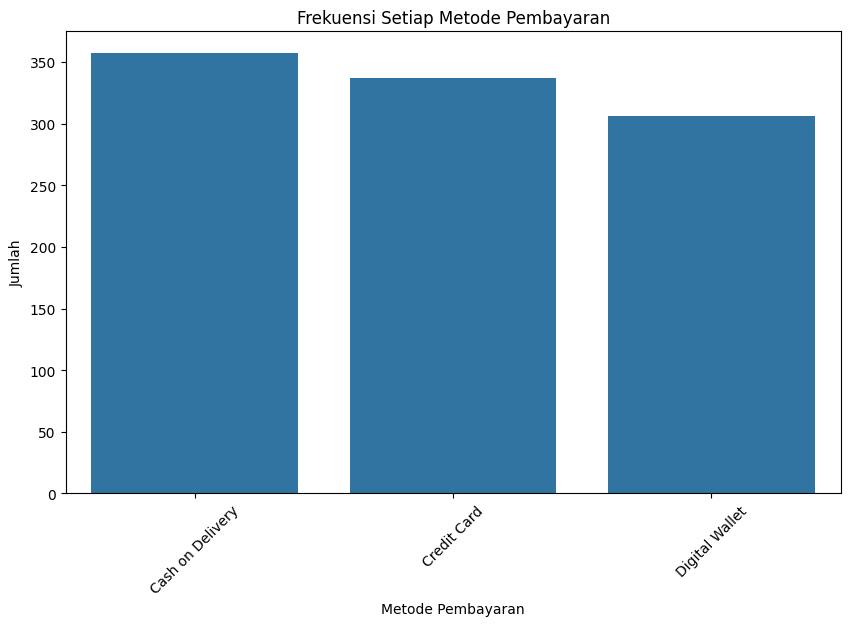

In [35]:
# Menampilkan jumlah masing-masing metode pembayaran
payment_method_counts = df['Payment Method'].value_counts()

# Menampilkan hasilnya
print(payment_method_counts)

# Membuat visualisasi bar chart untuk metode pembayaran
plt.figure(figsize=(10, 6))
sns.barplot(x=payment_method_counts.index, y=payment_method_counts.values)
plt.title('Frekuensi Setiap Metode Pembayaran')
plt.xlabel('Metode Pembayaran')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()


Rata-rata Keuntungan: 868.527


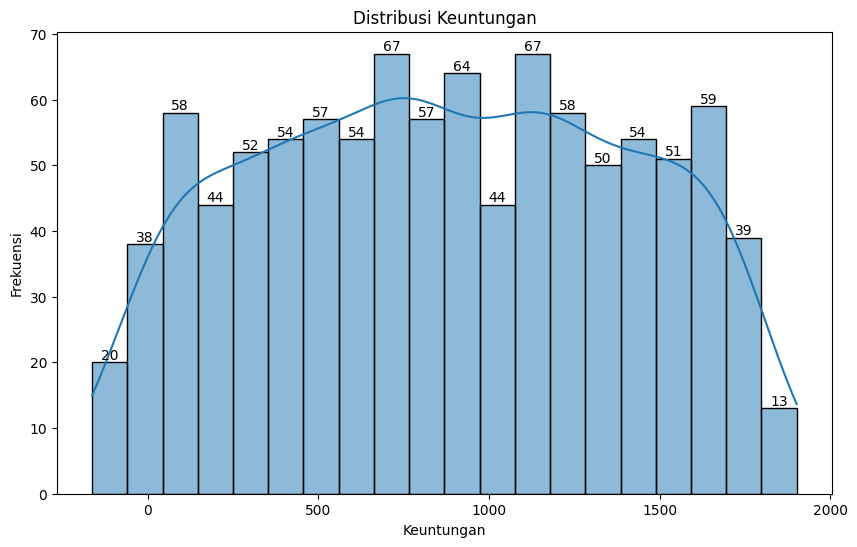

In [36]:
# Menghitung keuntungan dengan mengurangi biaya-biaya
df['Total Profit'] = df['Order Value'] - (df['Delivery Fee'] + df['Commission Fee'] + df['Payment Processing Fee'])

# Menampilkan rata-rata keuntungan
average_profit = df['Total Profit'].mean()
print(f"Rata-rata Keuntungan: {average_profit}")

# Menampilkan distribusi keuntungan
plt.figure(figsize=(10, 6))
ax = sns.histplot(df['Total Profit'], bins=20, kde=True)

# Menambahkan angka pada setiap bin
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.title('Distribusi Keuntungan')
plt.xlabel('Keuntungan')
plt.ylabel('Frekuensi')
plt.show()


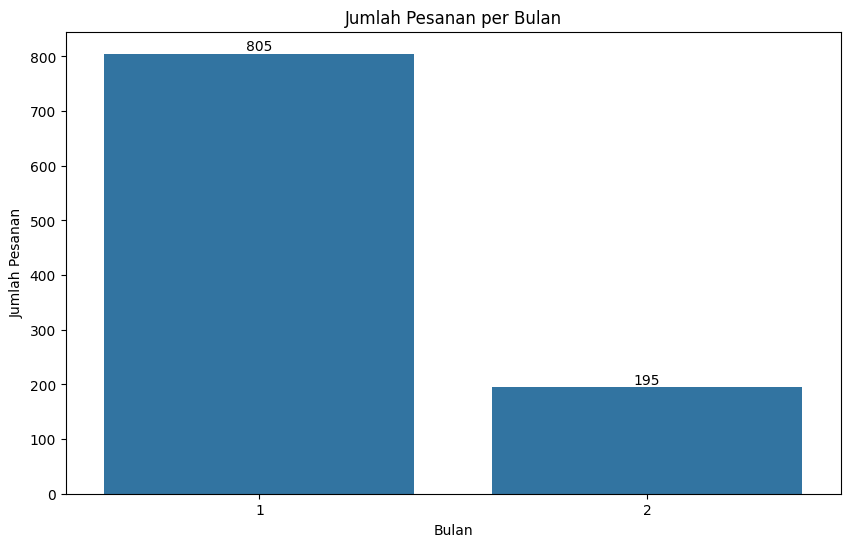

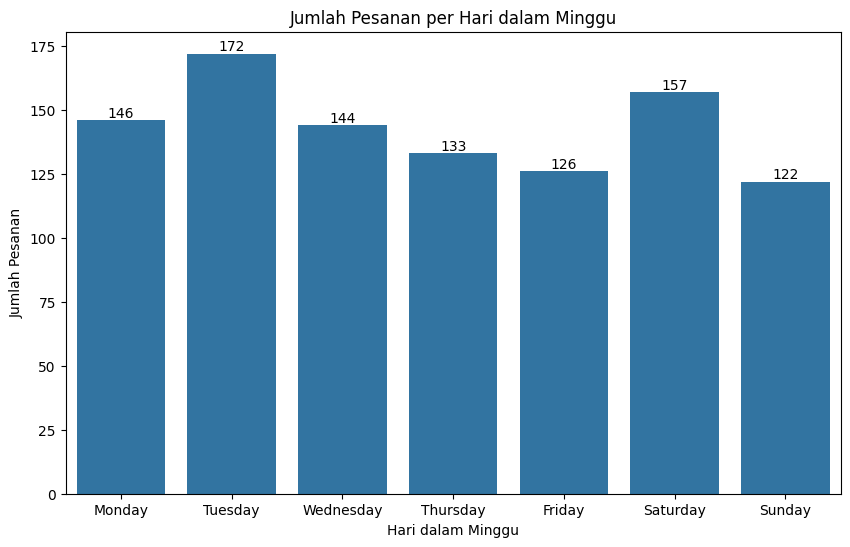

In [47]:
import calendar

# Mengubah kolom 'Order Date and Time' menjadi tipe datetime
df['Order Date and Time'] = pd.to_datetime(df['Order Date and Time'])

# Menambahkan kolom untuk bulan dan hari dalam minggu
df['Order Month'] = df['Order Date and Time'].dt.month
df['Order Day of Week'] = df['Order Date and Time'].dt.dayofweek

# Menampilkan jumlah pesanan berdasarkan bulan
monthly_orders = df['Order Month'].value_counts().sort_index()

# Visualisasi pesanan per bulan dengan angka 1-12
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=monthly_orders.index, y=monthly_orders.values)
plt.title('Jumlah Pesanan per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pesanan')

# Menambahkan angka pada setiap batang untuk bulan
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.show()

# Menampilkan jumlah pesanan berdasarkan hari dalam minggu (menggunakan nama hari)
day_of_week_orders = df['Order Day of Week'].value_counts().sort_index()

# Mengonversi angka hari ke nama hari
day_names = [calendar.day_name[i] for i in range(7)]

# Visualisasi pesanan per hari dalam minggu dengan nama hari
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=day_of_week_orders.index, y=day_of_week_orders.values)
plt.title('Jumlah Pesanan per Hari dalam Minggu')
plt.xlabel('Hari dalam Minggu')
plt.ylabel('Jumlah Pesanan')

# Menambahkan angka pada setiap batang untuk hari
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

# Menambahkan label nama hari pada sumbu x
plt.xticks(ticks=range(7), labels=day_names)

plt.show()


Restaurant ID
R2726    5845
R2083    5449
R2933    5397
R2329    4824
R2747    4776
R2355    4592
R2343    4316
R2704    4295
R2317    4209
R2222    4195
Name: Total Profit, dtype: int64


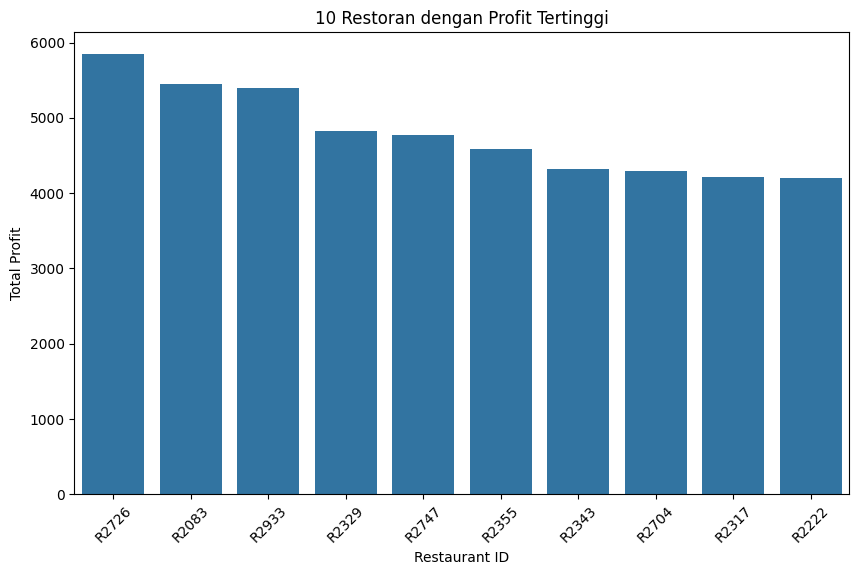

In [34]:
# Menghitung total profit per restoran
restaurant_profit = df.groupby('Restaurant ID')['Total Profit'].sum().sort_values(ascending=False)

# Menampilkan 10 restoran dengan profit tertinggi
print(restaurant_profit.head(10))

# Visualisasi top 10 restoran dengan profit tertinggi
plt.figure(figsize=(10, 6))
sns.barplot(x=restaurant_profit.head(10).index, y=restaurant_profit.head(10).values)
plt.title('10 Restoran dengan Profit Tertinggi')
plt.xlabel('Restaurant ID')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.show()


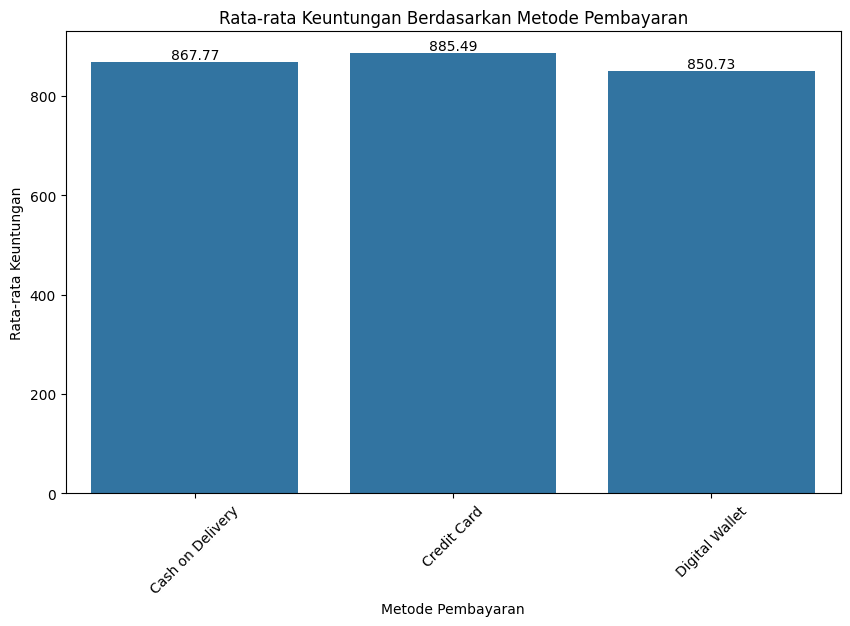

In [50]:
# Menghitung total profit berdasarkan metode pembayaran
profit_by_payment_method = df.groupby('Payment Method')['Total Profit'].mean()

# Visualisasi
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=profit_by_payment_method.index, y=profit_by_payment_method.values)
plt.title('Rata-rata Keuntungan Berdasarkan Metode Pembayaran')
plt.xlabel('Metode Pembayaran')
plt.ylabel('Rata-rata Keuntungan')
plt.xticks(rotation=45)

# Menambahkan angka di atas bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()


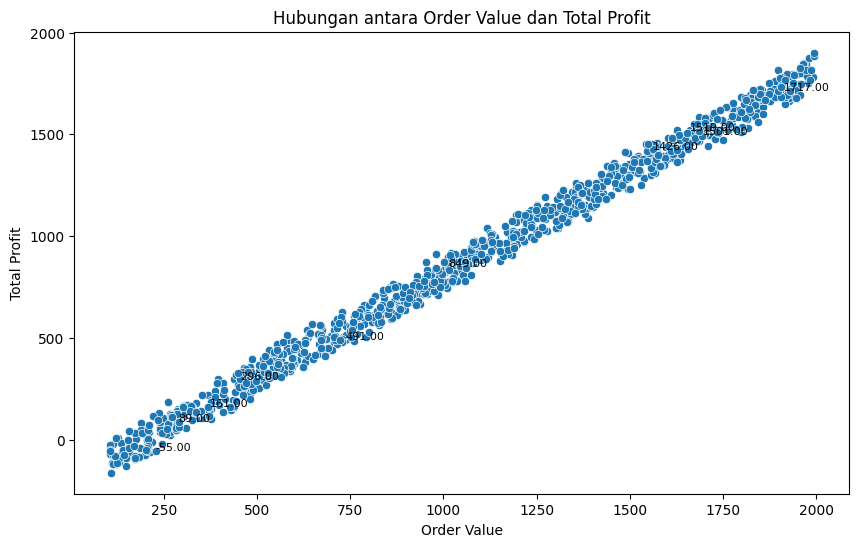

In [51]:
# Visualisasi hubungan antara Order Value dan Total Profit
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x=df['Order Value'], y=df['Total Profit'])
plt.title('Hubungan antara Order Value dan Total Profit')
plt.xlabel('Order Value')
plt.ylabel('Total Profit')

# Menambahkan angka di titik data
for i in range(0, len(df), len(df)//10):  # Menampilkan angka hanya untuk sebagian data
    ax.text(df['Order Value'].iloc[i], df['Total Profit'].iloc[i], f'{df["Total Profit"].iloc[i]:.2f}',
            color='black', fontsize=8)

plt.show()


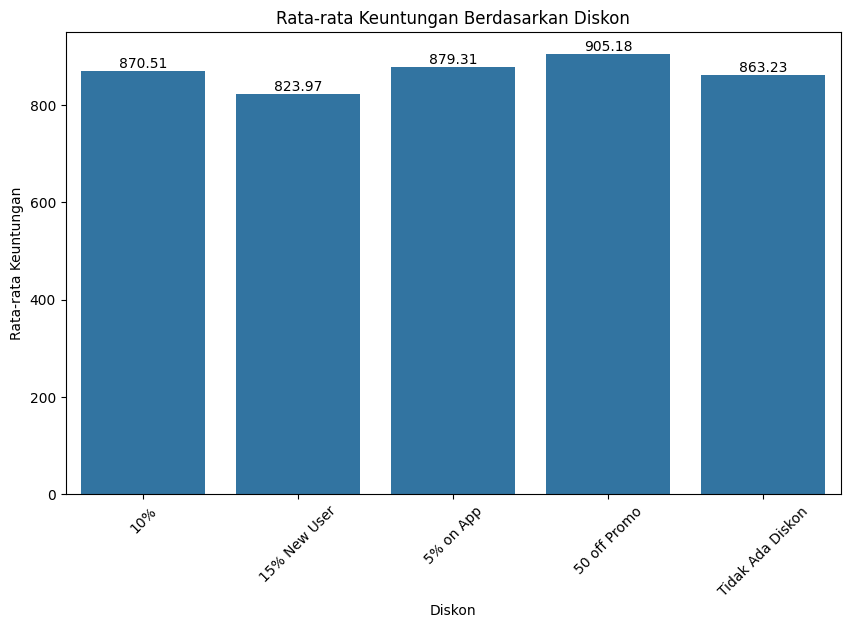

In [52]:
# Mengisi nilai NaN pada kolom Discounts and Offers dengan 'No Discount'
df['Discounts and Offers'].fillna('No Discount', inplace=True)

# Menghitung rata-rata keuntungan untuk pesanan dengan dan tanpa diskon
profit_by_discount = df.groupby('Discounts and Offers')['Total Profit'].mean()

# Visualisasi
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=profit_by_discount.index, y=profit_by_discount.values)
plt.title('Rata-rata Keuntungan Berdasarkan Diskon')
plt.xlabel('Diskon')
plt.ylabel('Rata-rata Keuntungan')
plt.xticks(rotation=45)

# Menambahkan angka di atas bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()


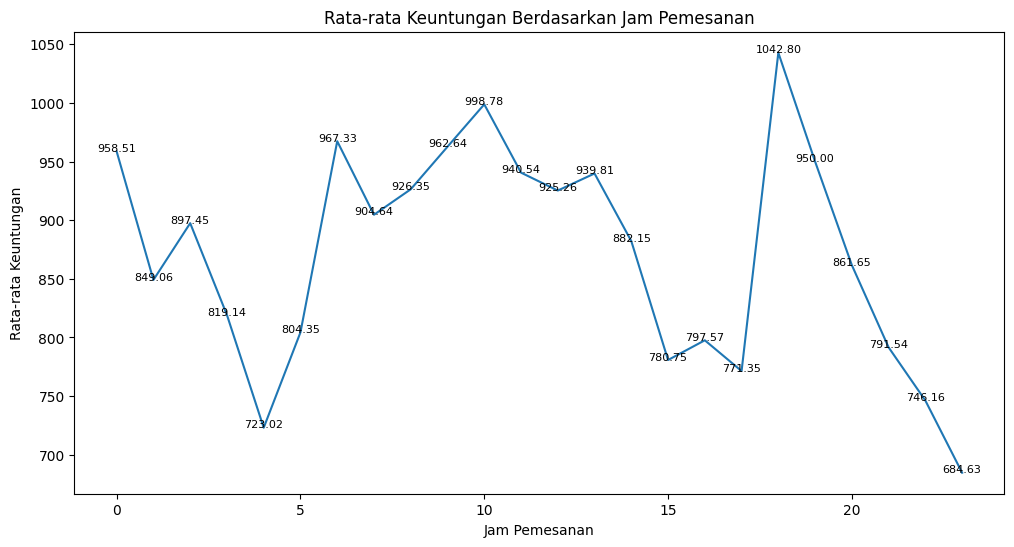

In [54]:
# Menambahkan kolom 'Hour of Day' untuk jam pemesanan
df['Order Hour'] = df['Order Date and Time'].dt.hour

# Menghitung rata-rata keuntungan berdasarkan jam pemesanan
profit_by_hour = df.groupby('Order Hour')['Total Profit'].mean()

# Visualisasi
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x=profit_by_hour.index, y=profit_by_hour.values)
plt.title('Rata-rata Keuntungan Berdasarkan Jam Pemesanan')
plt.xlabel('Jam Pemesanan')
plt.ylabel('Rata-rata Keuntungan')

# Menambahkan angka di titik data
for i in range(len(profit_by_hour)):
    ax.text(profit_by_hour.index[i], profit_by_hour.values[i], f'{profit_by_hour.values[i]:.2f}',
            color='black', fontsize=8, ha='center')

plt.show()


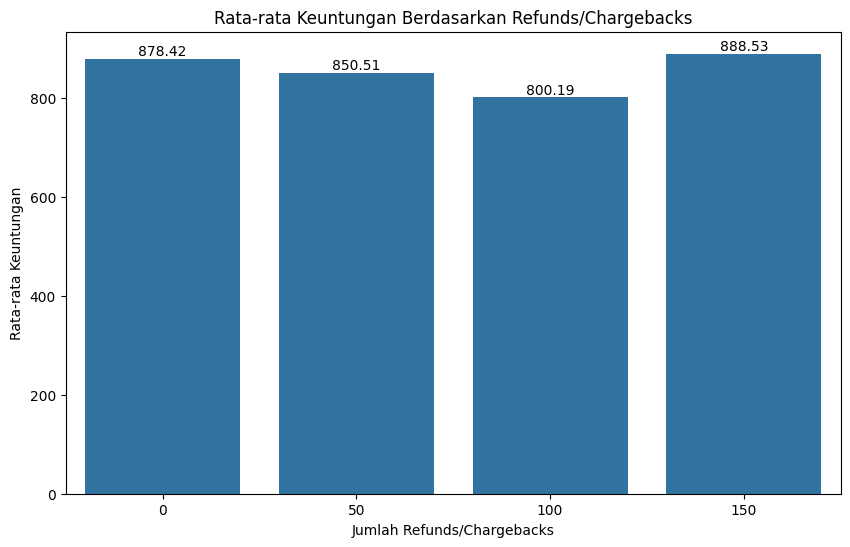

In [55]:
# Analisis keuntungan berdasarkan jumlah Refunds/Chargebacks
profit_by_refunds = df.groupby('Refunds/Chargebacks')['Total Profit'].mean()

# Visualisasi
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=profit_by_refunds.index, y=profit_by_refunds.values)
plt.title('Rata-rata Keuntungan Berdasarkan Refunds/Chargebacks')
plt.xlabel('Jumlah Refunds/Chargebacks')
plt.ylabel('Rata-rata Keuntungan')

# Menambahkan angka di atas bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()


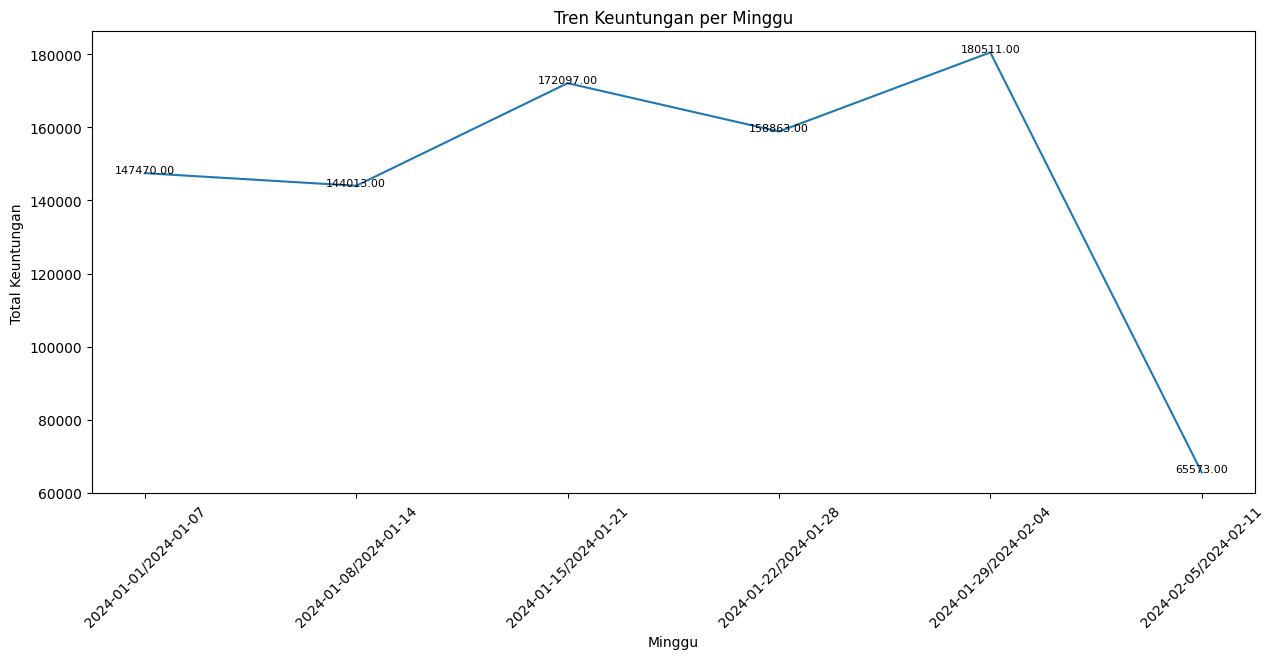

In [64]:
# Menghitung total keuntungan per minggu
df['Order Week'] = df['Order Date and Time'].dt.to_period('W')  # Menggunakan minggu
weekly_profit = df.groupby('Order Week')['Total Profit'].sum()

# Visualisasi
plt.figure(figsize=(15, 6))
ax = sns.lineplot(x=weekly_profit.index.astype(str), y=weekly_profit.values)
plt.title('Tren Keuntungan per Minggu')
plt.xlabel('Minggu')
plt.ylabel('Total Keuntungan')

# Menambahkan angka di titik data
for i in range(len(weekly_profit)):
    ax.text(i, weekly_profit.values[i], f'{weekly_profit.values[i]:.2f}', color='black', fontsize=8, ha='center')

plt.xticks(rotation=45)
plt.show()


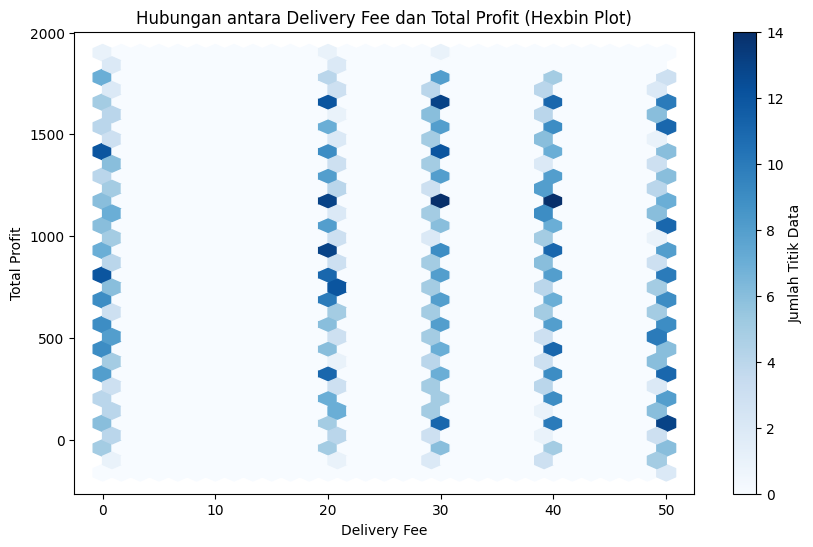

In [67]:
# Membuat Hexbin Plot
plt.figure(figsize=(10, 6))
plt.hexbin(df['Delivery Fee'], df['Total Profit'], gridsize=30, cmap='Blues')  # gridsize menentukan ukuran hexagonnya
plt.colorbar(label='Jumlah Titik Data')  # Menampilkan bar warna untuk jumlah titik
plt.title('Hubungan antara Delivery Fee dan Total Profit (Hexbin Plot)')
plt.xlabel('Delivery Fee')
plt.ylabel('Total Profit')

plt.show()


Pelanggan dengan Keuntungan Tertinggi:
Customer ID
C3832    3404
C8266    3391
C7949    3328
C5555    3199
C5146    3036
C8560    3020
C5000    2869
C1009    2801
C6732    2747
C4636    2698
Name: Total Profit, dtype: int64


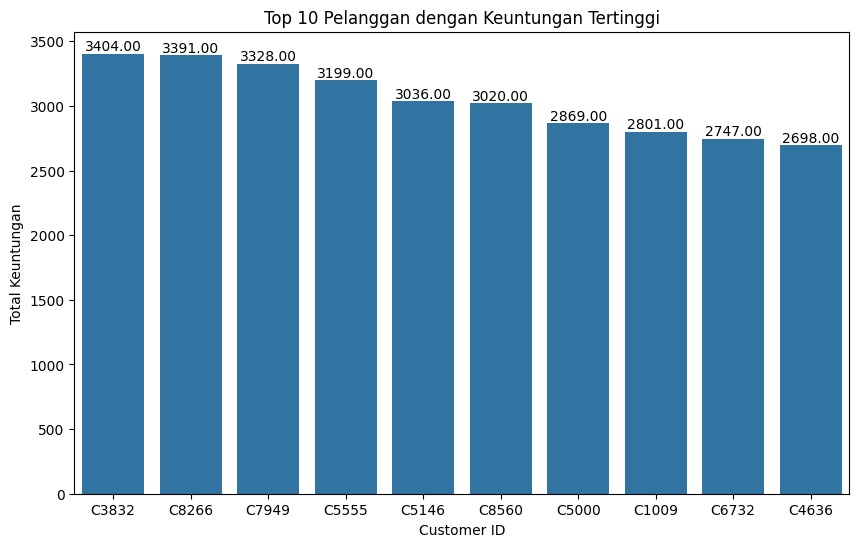

In [58]:
# Menghitung total keuntungan untuk setiap Customer ID
profit_by_customer = df.groupby('Customer ID')['Total Profit'].sum()

# Menampilkan pelanggan dengan keuntungan tertinggi
top_customers = profit_by_customer.sort_values(ascending=False).head(10)

# Menampilkan hasil
print("Pelanggan dengan Keuntungan Tertinggi:")
print(top_customers)

# Visualisasi top 10 pelanggan
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_customers.index, y=top_customers.values)
plt.title('Top 10 Pelanggan dengan Keuntungan Tertinggi')
plt.xlabel('Customer ID')
plt.ylabel('Total Keuntungan')

# Menambahkan angka di atas bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()


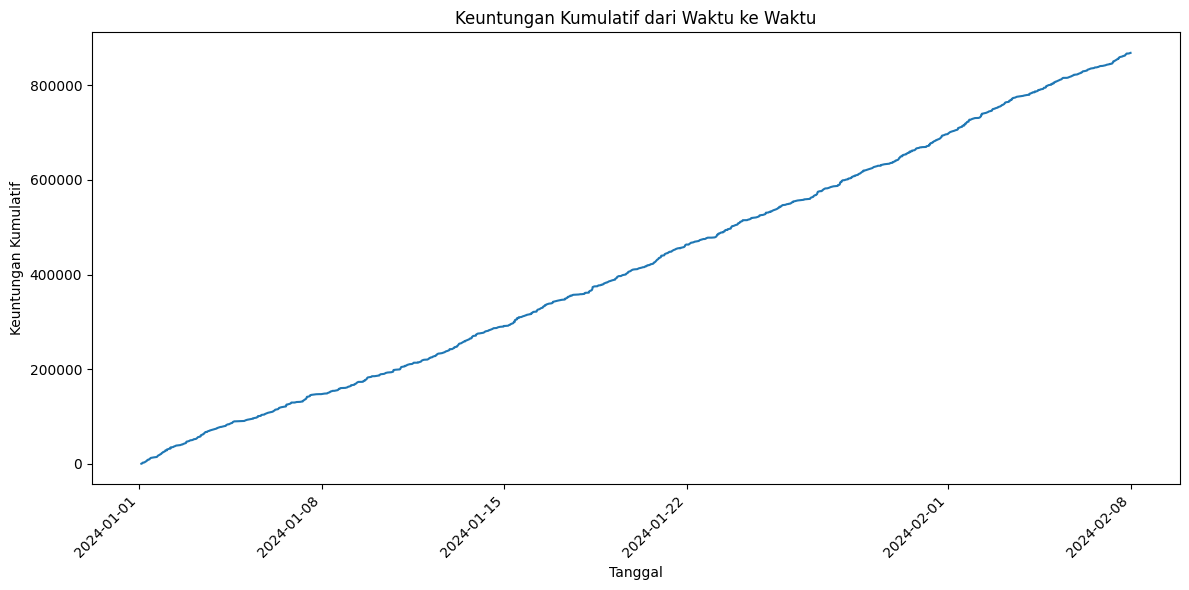

In [70]:
# Pastikan Order Date and Time sudah terurut
df = df.sort_values('Order Date and Time')

# Menghitung keuntungan kumulatif
df['Cumulative Profit'] = df['Total Profit'].cumsum()

# Visualisasi
plt.figure(figsize=(12, 6))
sns.lineplot(x=df['Order Date and Time'], y=df['Cumulative Profit'])

# Menambahkan detail visualisasi
plt.title('Keuntungan Kumulatif dari Waktu ke Waktu')
plt.xlabel('Tanggal')
plt.ylabel('Keuntungan Kumulatif')
plt.xticks(rotation=45, ha='right')  # Memutar dan merapikan label tanggal
plt.tight_layout()  # Menjaga agar tampilan tidak terpotong

plt.show()
